In [1]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv("/content/drive/MyDrive/Datasets/review.csv")
df.head(10)

,comment
0,"""The transitions between scenes were awkward, ..."
1,"""Severus Snape's role adds an intriguing layer."""
2,"""The pacing was a bit slow, but the characters..."
3,"""Hagrid's love for magical creatures is heartw..."
4,"""Neville Longbottom's courage is awe-inspiring."""
5,"""Rubeus Hagrid's love for magical creatures is..."
6,"""Severus Snape's complexity adds depth to the ..."
7,"""Albus Dumbledore's presence feels unnecessary..."
8,"""Ron Weasley's humor adds a delightful touch."""
9,"""Hermione Granger's determination is inspiring."""


# **Step-1:** Lowercase Conversion

In [4]:
df['comment'] = df['comment'].str.lower()

In [5]:
df.head(5)

,comment
0,"""the transitions between scenes were awkward, ..."
1,"""severus snape's role adds an intriguing layer."""
2,"""the pacing was a bit slow, but the characters..."
3,"""hagrid's love for magical creatures is heartw..."
4,"""neville longbottom's courage is awe-inspiring."""


# **Step-2:** Tokenization of the dataset

In [6]:
import nltk
nltk.download("punkt")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [7]:
df['comment'] = df['comment'].astype(str)
df['tokenized_comment_word'] = df['comment'].apply(nltk.word_tokenize)
df['tokenized_comment_sentence'] = df['comment'].apply(nltk.sent_tokenize)

In [8]:
df.head(20)

,comment,tokenized_comment_word,tokenized_comment_sentence
0,"""the transitions between scenes were awkward, ...","[``, the, transitions, between, scenes, were, ...","[""the transitions between scenes were awkward,..."
1,"""severus snape's role adds an intriguing layer.""","[``, severus, snape, 's, role, adds, an, intri...","[""severus snape's role adds an intriguing laye..."
2,"""the pacing was a bit slow, but the characters...","[``, the, pacing, was, a, bit, slow, ,, but, t...","[""the pacing was a bit slow, but the character..."
3,"""hagrid's love for magical creatures is heartw...","[``, hagrid, 's, love, for, magical, creatures...","[""hagrid's love for magical creatures is heart..."
4,"""neville longbottom's courage is awe-inspiring.""","[``, neville, longbottom, 's, courage, is, awe...","[""neville longbottom's courage is awe-inspirin..."
5,"""rubeus hagrid's love for magical creatures is...","[``, rubeus, hagrid, 's, love, for, magical, c...","[""rubeus hagrid's love for magical creatures i..."
6,"""severus snape's complexity adds depth to the ...","[``, severus, snape, 's, complexity, adds, dep...","[""severus snape's complexity adds depth to the..."
7,"""albus dumbledore's presence feels unnecessary...","[``, albus, dumbledore, 's, presence, feels, u...","[""albus dumbledore's presence feels unnecessar..."
8,"""ron weasley's humor adds a delightful touch.""","[``, ron, weasley, 's, humor, adds, a, delight...","[""ron weasley's humor adds a delightful touch.""]"
9,"""hermione granger's determination is inspiring.""","[``, hermione, granger, 's, determination, is,...","[""hermione granger's determination is inspirin..."


# **Step-3:** Removal of Stopwords

In [9]:
import nltk
nltk.download("stopwords")
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [10]:
stop_words = set(stopwords.words('english'))

In [11]:
def remove_stopwords(comment):
    word_tokens = nltk.word_tokenize(comment)
    filtered_comment = [word for word in word_tokens if word.lower() not in stop_words]
    filtered_comment = ' '.join(filtered_comment)
    return filtered_comment

df['comment_without_stopwords'] = df['comment'].apply(remove_stopwords)

In [12]:
df.head(15)

,comment,tokenized_comment_word,tokenized_comment_sentence,comment_without_stopwords
0,"""the transitions between scenes were awkward, ...","[``, the, transitions, between, scenes, were, ...","[""the transitions between scenes were awkward,...","`` transitions scenes awkward , soundtrack for..."
1,"""severus snape's role adds an intriguing layer.""","[``, severus, snape, 's, role, adds, an, intri...","[""severus snape's role adds an intriguing laye...",`` severus snape 's role adds intriguing layer...
2,"""the pacing was a bit slow, but the characters...","[``, the, pacing, was, a, bit, slow, ,, but, t...","[""the pacing was a bit slow, but the character...","`` pacing bit slow , characters charming . ''"
3,"""hagrid's love for magical creatures is heartw...","[``, hagrid, 's, love, for, magical, creatures...","[""hagrid's love for magical creatures is heart...",`` hagrid 's love magical creatures heartwarmi...
4,"""neville longbottom's courage is awe-inspiring.""","[``, neville, longbottom, 's, courage, is, awe...","[""neville longbottom's courage is awe-inspirin...",`` neville longbottom 's courage awe-inspiring...
5,"""rubeus hagrid's love for magical creatures is...","[``, rubeus, hagrid, 's, love, for, magical, c...","[""rubeus hagrid's love for magical creatures i...",`` rubeus hagrid 's love magical creatures end...
6,"""severus snape's complexity adds depth to the ...","[``, severus, snape, 's, complexity, adds, dep...","[""severus snape's complexity adds depth to the...",`` severus snape 's complexity adds depth stor...
7,"""albus dumbledore's presence feels unnecessary...","[``, albus, dumbledore, 's, presence, feels, u...","[""albus dumbledore's presence feels unnecessar...",`` albus dumbledore 's presence feels unnecess...
8,"""ron weasley's humor adds a delightful touch.""","[``, ron, weasley, 's, humor, adds, a, delight...","[""ron weasley's humor adds a delightful touch.""]",`` ron weasley 's humor adds delightful touch ...
9,"""hermione granger's determination is inspiring.""","[``, hermione, granger, 's, determination, is,...","[""hermione granger's determination is inspirin...",`` hermione granger 's determination inspiring...


In [13]:
from collections import Counter

In [14]:
all_words = [word for sublist in df['comment_without_stopwords'] for word in sublist]
word_freq = Counter(all_words)
word_count = sum(word_freq.values())
print("Word Frequency Distribution:",word_freq)
print("Total Word Count:", word_count)

Word Frequency Distribution: Counter({' ': 3933, 'e': 2233, 'a': 1553, 'r': 1387, 's': 1375, 'i': 1310, "'": 1251, 't': 1238, 'l': 1205, 'n': 1196, 'o': 1075, 'c': 998, '`': 982, 'd': 805, 'g': 678, 'm': 637, 'u': 582, 'h': 502, '.': 483, 'p': 414, 'f': 369, 'y': 316, 'v': 292, 'w': 253, 'b': 222, 'k': 107, 'x': 61, ',': 60, '-': 36, 'j': 22, 'z': 22, 'q': 17, '!': 8, 'é': 5, ';': 1})
Total Word Count: 25628


# **Step-4:** Word Frequency Distribution

In [15]:
import matplotlib.pyplot as plt

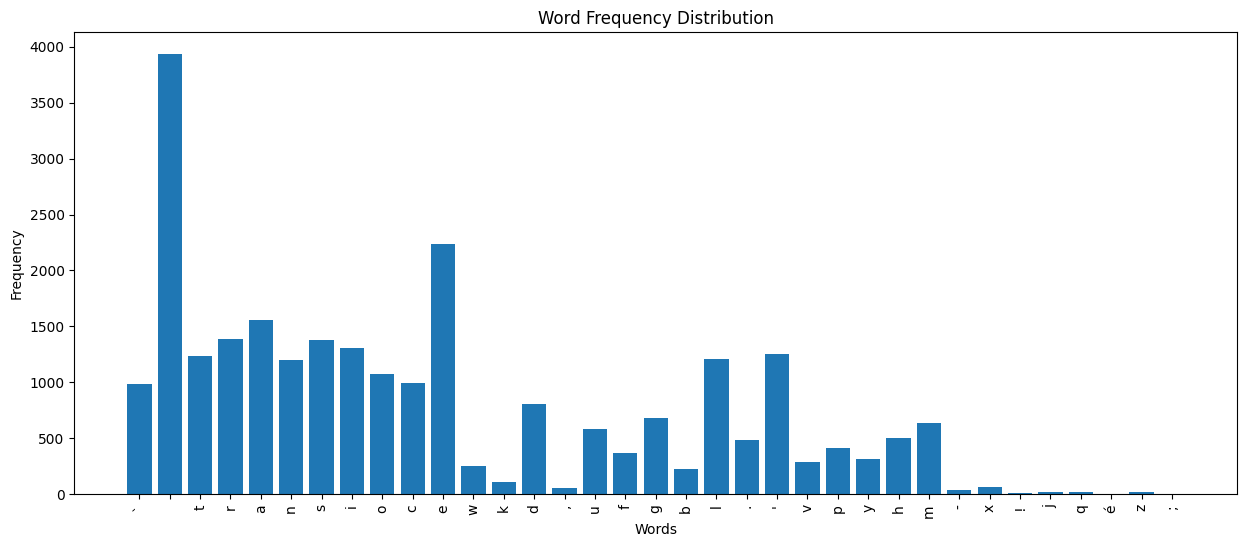

In [18]:
plt.figure(figsize=((15,6)))
plt.bar(word_freq.keys(),word_freq.values())
plt.xlabel("Words")
plt.ylabel('Frequency')
plt.title('Word Frequency Distribution')
plt.xticks(rotation=90)
plt.show()